In [78]:
import os
import pandas as pd
import numpy as np
import re 
import tabula
import matplotlib.pyplot as plt
import seaborn as sns

## Table 1 2000-2018

In [79]:
df_00 = tabula.read_pdf("2000.pdf", pages='11-12')
t1_00 = df_00[0]
t2_00 = df_00[1]

df_01 = tabula.read_pdf("2001.pdf", pages='13-14')
t1_01 = df_01[0]
t2_01 = df_01[1]

df_02 = tabula.read_pdf("2002.pdf", pages='13-14')
t1_02 = df_02[0]
t2_02 = df_02[1]

df_03 = tabula.read_pdf("2003.pdf", pages='15-16')
t1_03 = df_03[0]
t2_03 = df_03[1]

Got stderr: Mar 05, 2020 6:27:59 PM org.apache.pdfbox.rendering.CIDType0Glyph2D getPathForCharacterCode
Mar 05, 2020 6:27:59 PM org.apache.pdfbox.rendering.CIDType0Glyph2D getPathForCharacterCode
Mar 05, 2020 6:27:59 PM org.apache.pdfbox.rendering.CIDType0Glyph2D getPathForCharacterCode
Mar 05, 2020 6:28:00 PM org.apache.pdfbox.rendering.CIDType0Glyph2D getPathForCharacterCode
Mar 05, 2020 6:28:00 PM org.apache.pdfbox.rendering.CIDType0Glyph2D getPathForCharacterCode
Mar 05, 2020 6:28:00 PM org.apache.pdfbox.rendering.CIDType0Glyph2D getPathForCharacterCode

Got stderr: Mar 05, 2020 6:28:06 PM org.apache.pdfbox.rendering.CIDType0Glyph2D getPathForCharacterCode
Mar 05, 2020 6:28:06 PM org.apache.pdfbox.rendering.CIDType0Glyph2D getPathForCharacterCode
Mar 05, 2020 6:28:06 PM org.apache.pdfbox.rendering.CIDType0Glyph2D getPathForCharacterCode
Mar 05, 2020 6:28:06 PM org.apache.pdfbox.rendering.CIDType0Glyph2D getPathForCharacterCode
Mar 05, 2020 6:28:06 PM org.apache.pdfbox.rendering.CID

In [80]:
#cleaning table 1
early_years = [t1_00, t1_01, t1_02]
for index, df in enumerate(early_years):
    early_years[index] = df.rename(columns={"Incidents, Offenses, Victims, and Known Offenders": "Bias motivation", "Unnamed: 0": "Offenses", 
                  "Unnamed: 1": "Victims", "Unnamed: 2": "Known Offenders"}) #missing incidents
    early_years[index] = early_years[index].loc[6:30, :]
    early_years[index]['Bias motivation'] = early_years[index]['Bias motivation'].str.replace('\d+', '')
#     early_years[index]['Bias motivation'] = early_years[index]['Bias motivation'].str.replace(',', '')
    early_years[index] = early_years[index].set_index("Bias motivation")
    early_years[index] = early_years[index].drop([early_years[index].index[5], early_years[index].index[13],
                                                  early_years[index].index[-3], early_years[index].index[-6]])
    early_years[index] = early_years[index].replace(',','', regex=True)

[t1_00, t1_01, t1_02] = early_years

In [81]:
t1_03 = t1_03.rename(columns={"Incidents, Offenses, Victims, and Known Offenders": "Bias motivation", "Unnamed: 0": "Offenses", 
                  "Unnamed: 1": "Victims", "Unnamed: 2": "Known Offenders"})
t1_03 = t1_03.loc[5:31, :]
t1_03['Bias motivation'] = t1_03['Bias motivation'].str.replace('\d+', '')
# t1_03['Bias motivation'] = t1_03['Bias motivation'].str.replace(',', '')
t1_03 = t1_03.replace(',','', regex=True)

t1_03 = t1_03.set_index('Bias motivation')

#dropping additional rows that are unncessary 
t1_03 = t1_03.drop(t1_03.index[14])
t1_03 = t1_03.drop(t1_03.index[6])
t1_03 = t1_03.drop(t1_03.index[-7])
t1_03 = t1_03.drop(t1_03.index[-3])
t1_03 = t1_03.drop(t1_03.index[2])
t1_03 = t1_03.drop(t1_03.index[-4])

In [82]:
#renaming 2 indices that were cut off 
as_list = t1_03.index.tolist()
idx = as_list.index('Alaskan Native ')
as_list[idx] = 'Anti-American Indian/Alaskan Native'
t1_03.index = as_list

as_list1 = t1_03.index.tolist()
idx1 = as_list1.index('National Origin ')
as_list1[idx1] = 'Anti-Other Ethnicity/National Origin'
t1_03.index = as_list1


In [83]:
incidents_00 = ['875', '2884', '57', '281', '240', '1109', '56', '59', '28', '172', '44', '4', '896', '179',
               '182', '22', '20', '557', '354', '20', '16']
t1_00['Incidents'] = incidents_00
t1_00 = t1_00[['Incidents', 'Offenses', 'Victims', 'Known Offenders']]

incidents_01 = ['891', '2899', '80', '280', '217', '1043', '38', '35', '481', '181', '45', '5', '980', '205',
                '173', '18', '17', '597', '1501', '12','23']
t1_01['Incidents'] = incidents_01
t1_01 = t1_01[['Incidents', 'Offenses', 'Victims', 'Known Offenders']]

incidents_02 = ['719', '2486', '62', '217', '158', '931', '53', '55', '155', '198', '31', '3', '825', '172', '222',
               '10', '15', '480', '622', '20', '25']
t1_02['Incidents'] = incidents_02
t1_02 = t1_02[['Incidents', 'Offenses', 'Victims', 'Known Offenders']]

incidents_03 = ['830', '2548', '76', '231', '159', '927', '76', '49', '149', '109', '24', '9', '783', '187', '247', 
               '14', '8', '426', '600', '24', '9']
t1_03['Incidents'] = incidents_03
t1_03 = t1_03[['Incidents', 'Offenses', 'Victims', 'Known Offenders']]

In [155]:
#loading in the datasets

#table 1 
t1_04 = pd.read_excel('2004/Table1.xls')
t1_05 = pd.read_excel('2005/Table1.xls')
t1_06 = pd.read_excel('2006/Table1.xls')
t1_07 = pd.read_excel('2007/Table1.xls')
t1_08 = pd.read_excel('2008/Table1.xls')
t1_09 = pd.read_excel('2009/Table 1.xls')
t1_10 = pd.read_excel('2010/Table1.xls')
t1_11 = pd.read_excel('2011/Table1.xls')
t1_12 = pd.read_excel('2012/Table1.xls')
t1_13 = pd.read_excel('2013/Table1.xls')
t1_14 = pd.read_excel('2014/Table1.xls')
t1_15 = pd.read_excel('2015/Table1.xls')
t1_16 = pd.read_excel('2016/Table1.xls')
t1_17 = pd.read_excel('2017/Table1.xls')
t1_18 = pd.read_excel('2018/Table1.xls')

#table 2 
t2_04 = pd.read_excel('2004/Table2.xls')
t2_05 = pd.read_excel('2005/Table2.xls')
t2_06 = pd.read_excel('2006/Table2.xls')
t2_07 = pd.read_excel('2007/Table2.xls')
t2_08 = pd.read_excel('2008/Table2.xls')
t2_09 = pd.read_excel('2009/Table 2.xls')
t2_10 = pd.read_excel('2010/Table2.xls')
t2_11 = pd.read_excel('2011/Table2.xls')
t2_12 = pd.read_excel('2012/Table2.xls')
t2_13 = pd.read_excel('2013/Table2.xls')
t2_14 = pd.read_excel('2014/Table2.xls')
t2_15 = pd.read_excel('2015/Table2.xls')
t2_16 = pd.read_excel('2016/Table2.xls')
t2_17 = pd.read_excel('2017/Table2.xls')
t2_18 = pd.read_excel('2018/Table2.xls')



In [156]:
#cleaning table 1
table1 = [t1_04, t1_05, t1_06, t1_07, t1_08, t1_09]
for index, df in enumerate(table1):
    table1[index] = df.rename(columns={"Table 1": "Bias motivation", "Unnamed: 1": "Incidents", "Unnamed: 2": "Offenses", 
                  "Unnamed: 3": "Victims", "Unnamed: 4": "Known Offenders"})
    table1[index] = table1[index].loc[5:30, :].set_index('Bias motivation')
    table1[index] = table1[index].rename(index=lambda s: re.sub(r'\d+$', '', s)) #removing any digits inside the index column 
[t1_04, t1_05, t1_06, t1_07, t1_08, t1_09] = table1

In [157]:
#cleaning table 1
table1 = [t1_11, t1_12]
for index, df in enumerate(table1):
    table1[index] = df.rename(columns={"Table 1 ": "Bias motivation", "Unnamed: 1": "Incidents", "Unnamed: 2": "Offenses", 
                  "Unnamed: 3": "Victims", "Unnamed: 4": "Known Offenders"})
    table1[index] = table1[index].loc[6:30, :].set_index('Bias motivation')
    table1[index] = table1[index].rename(index=lambda s: re.sub(r'\d+$', '', s)) #removing any digits inside the index column 
    table1[index] = table1[index].replace(',','', regex=True)

[t1_11, t1_12] = table1


In [158]:
#cleaning table 1
table1 = [t1_10]
for index, df in enumerate(table1):
    table1[index] = df.rename(columns={"Table 1 ": "Bias motivation", "Unnamed: 1": "Incidents", "Unnamed: 2": "Offenses", 
                  "Unnamed: 3": "Victims", "Unnamed: 4": "Known Offenders"})
    table1[index] = table1[index].loc[5:29, :].set_index('Bias motivation')
    table1[index] = table1[index].rename(index=lambda s: re.sub(r'\d+$', '', s)) #removing any digits inside the index column 
    table1[index] = table1[index].replace(',','', regex=True)

[t1_10] = table1


In [159]:
#cleaning 2013-2014
table1 = [t1_13, t1_14]
for index, df in enumerate(table1):
    table1[index] = df.rename(columns={"Table 1 ": "Bias motivation", "Unnamed: 1": "Incidents", "Unnamed: 2": "Offenses", 
                  "Unnamed: 3": "Victims", "Unnamed: 4": "Known Offenders", "Unnamed: 5": "drop1", "Unnamed: 6": "drop2"})
    table1[index] = table1[index].loc[5:38, :].set_index('Bias motivation')
    table1[index] = table1[index].rename(index=lambda s: re.sub(r'\d+$', '', s)) #removing any digits inside the index column 
#[t1_10, t1_11, t1_12, t1_13, t1_14, t1_15, t1_16, t1_17, t1_18] = table1
[t1_13, t1_14] = table1

In [160]:
#drop rows in tables
table1 = [t1_13, t1_14]
for index, df in enumerate(table1):
    df = df.drop([df.index[0], df.index[7], df.index[15], df.index[21], df.index[24], df.index[27], df.index[30]])
    df = df.dropna(axis=1)
    table1[index] = df
[t1_13, t1_14] = table1

In [161]:
#cleaning 2015-2018
#table1 = [t1_10, t1_11, t1_12, t1_13, t1_14, t1_15, t1_16, t1_17, t1_18]
table1 = [t1_15, t1_16, t1_17, t1_18]
for index, df in enumerate(table1):
    table1[index] = df.rename(columns={"Table 1 ": "Bias motivation", "Unnamed: 1": "Incidents", "Unnamed: 2": "Offenses", 
                  "Unnamed: 3": "Victims", "Unnamed: 4": "Known Offenders", "Unnamed: 5": "drop1", "Unnamed: 6": "drop2"})
    table1[index] = table1[index].loc[5:45, :].set_index('Bias motivation')
    table1[index] = table1[index].rename(index=lambda s: re.sub(r'\d+$', '', s)) #removing any digits inside the index column 
#[t1_10, t1_11, t1_12, t1_13, t1_14, t1_15, t1_16, t1_17, t1_18] = table1
[t1_15, t1_16, t1_17, t1_18] = table1

In [162]:
#drop rows in tables
table1 = [t1_15, t1_16, t1_17, t1_18]
for index, df in enumerate(table1):
    df = df.drop([df.index[0], df.index[10], df.index[25], df.index[31], df.index[37]])
    df = df.dropna(axis=1)
    table1[index] = df
[t1_15, t1_16, t1_17, t1_18] = table1

In [163]:
#drop columns in tables
table1_2 = [t1_10, t1_11, t1_12]
for index, df in enumerate(table1_2):
    df = df.drop([df.index[5], df.index[13], df.index[-4], df.index[-7]])
    table1_2[index] = df
[t1_10, t1_11, t1_12] = table1_2

In [164]:
#dropping rows that are not needed (the totals)
t1_04 = t1_04.drop(t1_04.index[5])
t1_04 = t1_04.drop(t1_04.index[12])
t1_04 = t1_04.drop(t1_04.index[-4])
t1_04 = t1_04.drop(t1_04.index[-6])

t1_05 = t1_05.drop(t1_05.index[5])
t1_05 = t1_05.drop(t1_05.index[12])
t1_05 = t1_05.drop(t1_05.index[-4])
t1_05 = t1_05.drop(t1_05.index[-6])

t1_06 = t1_06.drop(t1_06.index[5])
t1_06 = t1_06.drop(t1_06.index[12])
t1_06 = t1_06.drop(t1_06.index[-4])
t1_06 = t1_06.drop(t1_06.index[-6])

t1_07 = t1_07.drop(t1_07.index[5])
t1_07 = t1_07.drop(t1_07.index[12])
t1_07 = t1_07.drop(t1_07.index[-4])
t1_07 = t1_07.drop(t1_07.index[-6])

t1_08 = t1_08.drop(t1_08.index[5])
t1_08 = t1_08.drop(t1_08.index[12])
t1_08 = t1_08.drop(t1_08.index[-4])
t1_08 = t1_08.drop(t1_08.index[-6])

t1_09 = t1_09.drop(t1_09.index[5])
t1_09 = t1_09.drop(t1_09.index[12])
t1_09 = t1_09.drop(t1_09.index[-4])
t1_09 = t1_09.drop(t1_09.index[-6])


#### Making different subsets from the original table on the types of hate crimes (race, religion, sexual orientation, etc)

In [94]:
race_00 = t1_00[:5]
race_01 = t1_01[:5]
race_02 = t1_02[:5]
race_03 = t1_03[:5]
race_04 = t1_04[:5]
race_05 = t1_05[:5]
race_06 = t1_06[:5]
race_07 = t1_07[:5]
race_08 = t1_08[:5]
race_09 = t1_09[:5]
race_10 = t1_10[:5]
race_11 = t1_11[:5]
race_12 = t1_12[:5]

In [95]:
religion_00 = t1_00[5:12]
religion_01 = t1_01[5:12]
religion_02 = t1_02[5:12]
religion_03 = t1_03[5:12]
religion_04 = t1_04[5:12]
religion_05 = t1_05[5:12]
religion_06 = t1_06[5:12]
religion_07 = t1_07[5:12]
religion_08 = t1_08[5:12]
religion_09 = t1_09[5:12]
religion_10 = t1_10[5:12]
religion_11 = t1_11[5:12]
religion_12 = t1_12[5:12]

In [96]:
sexual_orientation_00 = t1_00[12:17]
sexual_orientation_01 = t1_01[12:17]
sexual_orientation_02 = t1_02[12:17]
sexual_orientation_03 = t1_03[12:17]
sexual_orientation_04 = t1_04[12:17]
sexual_orientation_05 = t1_05[12:17]
sexual_orientation_06 = t1_06[12:17]
sexual_orientation_07 = t1_07[12:17]
sexual_orientation_08 = t1_08[12:17]
sexual_orientation_09 = t1_09[12:17]
sexual_orientation_10 = t1_10[12:17]
sexual_orientation_11 = t1_11[12:17]
sexual_orientation_12 = t1_12[12:17]


In [97]:
ethnicity_00 = t1_00[17:19]
ethnicity_01 = t1_01[17:19]
ethnicity_02 = t1_02[17:19]
ethnicity_03 = t1_03[17:19]
ethnicity_04 = t1_04[17:19]
ethnicity_05 = t1_05[17:19]
ethnicity_06 = t1_06[17:19]
ethnicity_07 = t1_07[17:19]
ethnicity_08 = t1_08[17:19]
ethnicity_09 = t1_09[17:19]
ethnicity_10 = t1_10[17:19]
ethnicity_11 = t1_11[17:19]
ethnicity_12 = t1_12[17:19]


In [98]:
disability_00 = t1_00[-2:]
disability_01 = t1_01[-2:]
disability_02 = t1_02[-2:]
disability_03 = t1_03[-2:]
disability_04 = t1_04[-3:-1]
disability_05 = t1_05[-3:-1]
disability_06 = t1_06[-3:-1]
disability_07 = t1_07[-3:-1]
disability_08 = t1_08[-3:-1]
disability_09 = t1_09[-3:-1]
disability_10 = t1_10[-3:-1]
disability_11 = t1_11[-3:-1]
disability_12 = t1_12[-3:-1]


In [191]:
race_13 = t1_13[1:6]
religion_13 = t1_13[6:13]
sexual_orientation_13 = t1_13[13:18]
ethnicity_13 = t1_13[18:20]
disability_13 = t1_13[20:22]
gender_13 = t1_13[22:24]
gender_id_13 = t1_13[24:26] 

race_14 = t1_14[0:6]
religion_14 = t1_14[6:13]
sexual_orientation_14 = t1_14[13:18]
ethnicity_14 = t1_14[18:20]
disability_14 = t1_14[20:22]
gender_14 = t1_14[22:24]
gender_id_14 = t1_14[24:26] 

In [100]:
#2015-2018
race_ethn_15 = t1_15[1:10]
race_ethn_16 = t1_16[1:10]
race_ethn_17 = t1_17[1:10]
race_ethn_18 = t1_18[1:10]

religion_15 = t1_15[11:25]
religion_16 = t1_16[11:25]
religion_17 = t1_17[11:25]
religion_18 = t1_18[11:25]

sexual_orientation_15 = t1_15[26:31] 
sexual_orientation_16 = t1_16[26:31] 
sexual_orientation_17 = t1_17[26:31] 
sexual_orientation_18 = t1_18[26:31] 

disability_15 = t1_15[32:34]
disability_16 = t1_16[32:34]
disability_17 = t1_17[32:34]
disability_18 = t1_18[32:34]

gender_15 = t1_15[35:37]
gender_16 = t1_16[35:37]
gender_17 = t1_17[35:37]
gender_18 = t1_18[35:37]

gender_id_15 = t1_15[38:40]
gender_id_16 = t1_16[38:40]
gender_id_17 = t1_17[38:40]
gender_id_18 = t1_18[38:40]

## Table 2 2000-2018

In [101]:
#cleaning table 2 
table2 = [t2_04, t2_05, t2_06, t2_07, t2_08, t2_09]
for index, df in enumerate(table2):
    table2[index] = df.rename(columns={"Table 2": "Offense Type", "Unnamed: 1": "Incidents", "Unnamed: 2": "Offenses", 
                  "Unnamed: 3": "Victims", "Unnamed: 4": "Known Offenders"})
    table2[index] = table2[index].loc[4:18, :].set_index('Offense Type')
    table2[index] = table2[index].rename(index=lambda s: re.sub(r'\d+$', '', s)) #removing any digits inside the index column 
[t2_04, t2_05, t2_06, t2_07, t2_08, t2_09] = table2

In [102]:
crimes_a_persons = t2_04[:6]
crimes_a_property = t2_04[7:14]
crimes_a_society = t2_04[-1:]

In [103]:
t2_04 = t2_04.drop(t2_04.index[6])
t2_04

,Incidents,Offenses,Victims,Known Offenders
Offense Type,,,,
Murder and nonnegligent manslaughter,5,5,5,5
Forcible rape,4,4,4,5
Aggravated assault,765,1040,1040,1316
Simple assault,1448,1750,1750,2190
Intimidation,2267,2827,2827,2173
Other,14,16,16,21
Robbery,112,112,142,241
Burglary,146,146,169,130
Larceny-theft,169,169,186,134


## Data Visualization

In [104]:
race_sum = (sum(map(int, race_00.Victims)), sum(map(int, race_01.Victims)), sum(map(int, race_02.Victims)), 
          sum(map(int, race_03.Victims)), sum(map(int, race_04.Victims)), sum(map(int, race_05.Victims)), 
           sum(map(int, race_06.Victims)), sum(map(int, race_07.Victims)), sum(map(int, race_08.Victims)), 
            sum(map(int, race_09.Victims)), sum(map(int, race_10.Victims)), sum(map(int, race_11.Victims)), 
            sum(map(int, race_12.Victims)))
        
religion_sum = (sum(map(int, religion_00.Victims)), sum(map(int, religion_01.Victims)), 
                sum(map(int, religion_02.Victims)), sum(map(int, religion_03.Victims)), sum(map(int, religion_04.Victims)),
               sum(map(int, religion_05.Victims)), sum(map(int, religion_06.Victims)), sum(map(int, religion_07.Victims)),
               sum(map(int, religion_08.Victims)), sum(map(int, religion_09.Victims)), sum(map(int, religion_10.Victims)), 
               sum(map(int, religion_11.Victims)), sum(map(int, religion_12.Victims)))

sexual_orientation_sum = (sum(map(int, sexual_orientation_00.Victims)), sum(map(int, sexual_orientation_01.Victims)), 
                sum(map(int, sexual_orientation_02.Victims)), sum(map(int, sexual_orientation_03.Victims)),
                         sum(map(int, sexual_orientation_04.Victims)), sum(map(int, sexual_orientation_05.Victims)), 
                         sum(map(int, sexual_orientation_06.Victims)), sum(map(int, sexual_orientation_07.Victims)), 
                         sum(map(int, sexual_orientation_08.Victims)), sum(map(int, sexual_orientation_09.Victims)), 
                         sum(map(int, sexual_orientation_10.Victims)), sum(map(int, sexual_orientation_11.Victims)),
                         sum(map(int, sexual_orientation_12.Victims)))

ethnicity_sum = (sum(map(int, ethnicity_00.Victims)), sum(map(int, ethnicity_01.Victims)), 
                sum(map(int, ethnicity_02.Victims)), sum(map(int, ethnicity_03.Victims)), sum(map(int, ethnicity_04.Victims)),
                sum(map(int, ethnicity_05.Victims)), sum(map(int, ethnicity_06.Victims)), sum(map(int, ethnicity_07.Victims)), 
                sum(map(int, ethnicity_08.Victims)), sum(map(int, ethnicity_09.Victims)), sum(map(int, ethnicity_10.Victims)), 
                sum(map(int, ethnicity_11.Victims)), sum(map(int, ethnicity_12.Victims)))

disability_sum = (sum(map(int, disability_00.Victims)), sum(map(int, disability_01.Victims)), 
          sum(map(int, disability_02.Victims)), sum(map(int, disability_03.Victims)), sum(map(int, disability_04.Victims)),
                 sum(map(int, disability_05.Victims)), sum(map(int, disability_06.Victims)), sum(map(int, disability_07.Victims)), 
                  sum(map(int, disability_08.Victims)), sum(map(int, disability_09.Victims)), sum(map(int, disability_10.Victims)),
                  sum(map(int, disability_11.Victims)), sum(map(int, disability_12.Victims))
                  
                 )

In [198]:
race_13 = t1_13[1:6]
religion_13 = t1_13[6:13]
sexual_orientation_13 = t1_13[13:18]
ethnicity_13 = t1_13[18:20]
disability_13 = t1_13[20:22]
gender_13 = t1_13[22:24]
gender_id_13 = t1_13[24:26] 

,Incidents,Offenses,Victims,Known Offenders
Bias motivation,,,,
Anti-White,653,728,754,680
Anti-Black or African American,1856,2263,2371,1747
Anti-American Indian or Alaska Native,129,146,159,108
Anti-Asian,135,158,164,130
Anti-Native Hawaiian or Other Pacific Islander,3,3,3,7
"Anti-Multiple Races, Group",95,109,112,61
Anti-Jewish,625,689,737,393
Anti-Catholic,70,74,75,72
Anti-Protestant,35,42,47,17


In [105]:
sum_00 = (race_sum[0], religion_sum[0], sexual_orientation_sum[0], ethnicity_sum[0], disability_sum[0])
perc_00 = tuple(np.array(sum_00)/sum(sum_00))

sum_01 = (race_sum[1], religion_sum[1], sexual_orientation_sum[1], ethnicity_sum[1], disability_sum[1])
perc_01 = tuple(np.array(sum_01)/sum(sum_01))

sum_02 = (race_sum[2], religion_sum[2], sexual_orientation_sum[2], ethnicity_sum[2], disability_sum[2])
perc_02 = tuple(np.array(sum_02)/sum(sum_02))

sum_03 = (race_sum[3], religion_sum[3], sexual_orientation_sum[3], ethnicity_sum[3], disability_sum[3])
perc_03 = tuple(np.array(sum_03)/sum(sum_03))

sum_04 = (race_sum[4], religion_sum[4], sexual_orientation_sum[4], ethnicity_sum[4], disability_sum[4])
perc_04 = tuple(np.array(sum_04)/sum(sum_04))

sum_05 = (race_sum[5], religion_sum[5], sexual_orientation_sum[5], ethnicity_sum[5], disability_sum[5])
perc_05 = tuple(np.array(sum_05)/sum(sum_05))

sum_06 = (race_sum[6], religion_sum[6], sexual_orientation_sum[6], ethnicity_sum[6], disability_sum[6])
perc_06 = tuple(np.array(sum_06)/sum(sum_06))

sum_07 = (race_sum[7], religion_sum[7], sexual_orientation_sum[7], ethnicity_sum[7], disability_sum[7])
perc_07 = tuple(np.array(sum_07)/sum(sum_07))

sum_08 = (race_sum[8], religion_sum[8], sexual_orientation_sum[8], ethnicity_sum[8], disability_sum[8])
perc_08 = tuple(np.array(sum_08)/sum(sum_08))

sum_09 = (race_sum[9], religion_sum[9], sexual_orientation_sum[9], ethnicity_sum[9], disability_sum[9])
perc_09 = tuple(np.array(sum_09)/sum(sum_09))

sum_10 = (race_sum[10], religion_sum[10], sexual_orientation_sum[10], ethnicity_sum[10], disability_sum[10])
perc_10 = tuple(np.array(sum_10)/sum(sum_10))

sum_11 = (race_sum[11], religion_sum[11], sexual_orientation_sum[11], ethnicity_sum[11], disability_sum[11])
perc_11 = tuple(np.array(sum_11)/sum(sum_11))

sum_12 = (race_sum[12], religion_sum[12], sexual_orientation_sum[12], ethnicity_sum[12], disability_sum[12])
perc_12 = tuple(np.array(sum_12)/sum(sum_12))

race_perc = (perc_00[0], perc_01[0], perc_02[0], perc_03[0], perc_04[0], perc_05[0], perc_06[0], 
             perc_07[0], perc_08[0], perc_09[0], perc_10[0], perc_11[0], perc_12[0])
religion_perc = (perc_00[1], perc_01[1], perc_02[1], perc_03[1], perc_04[1], perc_05[1], perc_06[1], 
             perc_07[1], perc_08[1], perc_09[1], perc_10[1], perc_11[1], perc_12[1])
sexual_orient_perc = (perc_00[2], perc_01[2], perc_02[2], perc_03[2], perc_04[2], perc_05[2], perc_06[2], 
             perc_07[2], perc_08[2], perc_09[2], perc_10[2], perc_11[2], perc_12[2])
ethnicity_perc = (perc_00[3], perc_01[3], perc_02[3], perc_03[3], perc_04[3], perc_05[3], perc_06[3], 
             perc_07[3], perc_08[3], perc_09[3], perc_10[3], perc_11[3], perc_12[3])
disability_perc = (perc_00[4], perc_01[4], perc_02[4], perc_03[4], perc_04[4], perc_05[4], perc_06[4], 
             perc_07[4], perc_08[4], perc_09[4], perc_10[4], perc_11[4], perc_12[4])

### Victims and the Hate Crime by Percentages

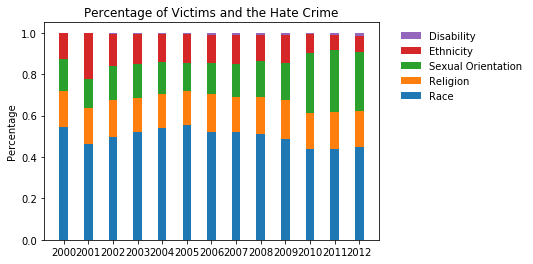

In [106]:
N = 13
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

sexual_orientation_bot = np.array(race_perc) + np.array(religion_perc)
ethnicity_bot = sexual_orientation_bot + np.array(sexual_orient_perc)
disability_bot = ethnicity_bot + np.array(ethnicity_perc)

p1 = plt.bar(ind, race_perc, width)
p2 = plt.bar(ind, religion_perc, width, bottom = race_perc)
p3 = plt.bar(ind, sexual_orient_perc, width, bottom = sexual_orientation_bot)
p4 = plt.bar(ind, ethnicity_perc, width, bottom = ethnicity_bot)
p5 = plt.bar(ind, disability_perc, width, bottom = disability_bot)


plt.ylabel('Percentage')
plt.title('Percentage of Victims and the Hate Crime')
plt.xticks(ind, ('2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012'))
plt.legend((p1[0], p2[0], p3[0], p4[0], p5[0]), ('Race', 'Religion', 'Sexual Orientation', 'Ethnicity', 'Disability'),
                                                labelspacing=-2.5, frameon=False, bbox_to_anchor=(1.04,.8), loc=6)

plt.show()

In [107]:
t1_14

,Incidents,Offenses,Victims,Known Offenders
Bias motivation,,,,
Anti-White,593,701,734,635
Anti-Black or African American,1621,1955,2022,1442
Anti-American Indian or Alaska Native,130,142,148,108
Anti-Asian,140,168,201,187
Anti-Native Hawaiian or Other Pacific Islander,3,4,4,3
"Anti-Multiple Races, Group",81,111,118,56
Anti-Jewish,609,635,648,380
Anti-Catholic,64,67,70,35
Anti-Protestant,25,28,28,12


### Victims and the Hate Crime by Count

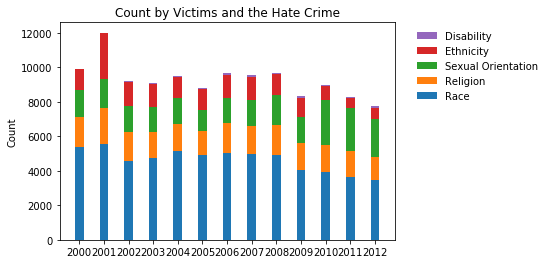

In [108]:
N = 13
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

sexual_orientation_bot = np.array(religion_sum) + np.array(race_sum)
ethnicity_bot = sexual_orientation_bot + np.array(sexual_orientation_sum)
disability_bot = ethnicity_bot + np.array(ethnicity_sum)

p1 = plt.bar(ind, race_sum, width)
p2 = plt.bar(ind, religion_sum, width, bottom = race_sum)
p3 = plt.bar(ind, sexual_orientation_sum, width, bottom = np.array(religion_sum) + np.array(race_sum))
p4 = plt.bar(ind, ethnicity_sum, width, bottom = ethnicity_bot)
p5 = plt.bar(ind, disability_sum, width, bottom = disability_bot)


plt.ylabel('Count')
plt.title('Count by Victims and the Hate Crime')
plt.xticks(ind, ('2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012'))
plt.legend((p1[0], p2[0], p3[0], p4[0], p5[0]), ('Race', 'Religion', 'Sexual Orientation', 'Ethnicity', 'Disability'),
          labelspacing=-2.5, frameon=False, bbox_to_anchor=(1.04,.8), loc=6)

plt.show()

### Victims and Hate Crime from 2015-2018

In [196]:
race_sum1 = (sum(map(int, race_ethn_15.Victims)), sum(map(int, race_ethn_16.Victims)), sum(map(int, race_ethn_17.Victims)), 
             sum(map(int, race_ethn_18.Victims)))
        
religion_sum1 = (sum(map(int, religion_15.Victims)), sum(map(int, religion_16.Victims)), 
                sum(map(int, religion_17.Victims)), sum(map(int, religion_18.Victims)))

sexual_orientation_sum1 = (sum(map(int, sexual_orientation_15.Victims)), sum(map(int, sexual_orientation_16.Victims)), 
                sum(map(int, sexual_orientation_17.Victims)), sum(map(int, sexual_orientation_18.Victims)))

disability_sum1 = (sum(map(int, gender_15.Victims)), sum(map(int, gender_16.Victims)), 
                  sum(map(int, gender_17.Victims)), sum(map(int, gender_18.Victims)))

gender_sum = (sum(map(int, disability_15.Victims)), sum(map(int, disability_16.Victims)), 
                  sum(map(int, disability_17.Victims)), sum(map(int, disability_18.Victims)))

gender_id_sum = (sum(map(int, gender_id_15.Victims)), sum(map(int, gender_id_16.Victims)), 
                  sum(map(int, gender_id_17.Victims)), sum(map(int, gender_id_18.Victims)))

sum_15 = (race_sum1[0], religion_sum1[0], sexual_orientation_sum1[0], disability_sum1[0], gender_id_sum[0], gender_sum[0])
perc_15 = tuple(np.array(sum_15)/sum(sum_15))

sum_16 = (race_sum1[1], religion_sum1[1], sexual_orientation_sum1[1], disability_sum1[1], gender_id_sum[1], gender_sum[1])
perc_16 = tuple(np.array(sum_16)/sum(sum_16))

sum_17 = (race_sum1[2], religion_sum1[2], sexual_orientation_sum1[2], disability_sum1[2], gender_id_sum[2], gender_sum[2])
perc_17 = tuple(np.array(sum_17)/sum(sum_17))

sum_18 = (race_sum1[3], religion_sum1[3], sexual_orientation_sum1[3], disability_sum1[3], gender_id_sum[3], gender_sum[3])
perc_18 = tuple(np.array(sum_18)/sum(sum_18))



race_perc1 = (perc_15[0], perc_16[0], perc_17[0], perc_18[0])
religion_perc1 = (perc_15[1], perc_16[1], perc_17[1], perc_18[1])
sexual_orient_perc1 = (perc_15[2], perc_16[2], perc_17[2], perc_18[2])
disability_perc1 = (perc_15[3], perc_16[3], perc_17[3], perc_18[3])
gender_perc = (perc_15[4], perc_16[4], perc_17[4], perc_18[4])
gender_id_perc = (perc_15[5], perc_16[5], perc_17[5], perc_18[5])

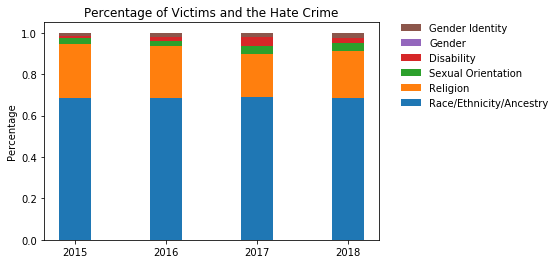

In [197]:
N = 4
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

sexual_orientation_bot = np.array(race_perc1) + np.array(religion_perc1)
ethnicity_bot = sexual_orientation_bot + np.array(sexual_orient_perc1)
disability_bot = ethnicity_bot + np.array(disability_perc1)
gender_bot = disability_bot + np.array(gender_perc)

p1 = plt.bar(ind, race_perc1, width)
p2 = plt.bar(ind, religion_perc1, width, bottom = race_perc1)
p3 = plt.bar(ind, sexual_orient_perc1, width, bottom = sexual_orientation_bot)
p4 = plt.bar(ind, disability_perc1, width, bottom = ethnicity_bot)
p5 = plt.bar(ind, gender_perc, width, bottom = disability_bot)
p6 = plt.bar(ind, gender_id_perc, width, bottom = disability_bot)


plt.ylabel('Percentage')
plt.title('Percentage of Victims and the Hate Crime')
plt.xticks(ind, ('2015', '2016', '2017', '2018'))
plt.legend((p1[0], p2[0], p3[0], p4[0], p5[0], p6[0]), ('Race/Ethnicity/Ancestry', 'Religion', 'Sexual Orientation', 'Disability', 'Gender', 'Gender Identity'),
                                                labelspacing=-2.5, frameon=False, bbox_to_anchor=(1.04,.8), loc=6)

plt.show()

### Line plot for Trends Table 1

In [111]:
num_incidents = (t1_00.astype(int).sum()['Incidents'], t1_01.astype(int).sum()['Incidents'], 
                 t1_02.astype(int).sum()['Incidents'], t1_03.astype(int).sum()['Incidents'],
                 t1_04.astype(int).sum()['Incidents'], t1_05.astype(int).sum()['Incidents'], 
                 t1_06.astype(int).sum()['Incidents'], t1_07.astype(int).sum()['Incidents'],
                 t1_08.astype(int).sum()['Incidents'], t1_09.astype(int).sum()['Incidents'],
                 t1_10.astype(int).sum()['Incidents'], t1_11.astype(int).sum()['Incidents'],
                 t1_12.astype(int).sum()['Incidents'], t1_13.astype(int).sum()['Incidents'],
                 t1_14.astype(int).sum()['Incidents'], t1_15.astype(int).sum()['Incidents'], 
                 t1_16.astype(int).sum()['Incidents'], t1_17.astype(int).sum()['Incidents'], 
                 t1_18.astype(int).sum()['Incidents'])
num_incidents = list(num_incidents)

num_offenses = (t1_00.astype(int).sum()['Offenses'], t1_01.astype(int).sum()['Offenses'], 
                 t1_02.astype(int).sum()['Offenses'], t1_03.astype(int).sum()['Offenses'],
                 t1_04.astype(int).sum()['Offenses'], t1_05.astype(int).sum()['Offenses'], 
                 t1_06.astype(int).sum()['Offenses'], t1_07.astype(int).sum()['Offenses'],
                 t1_08.astype(int).sum()['Offenses'], t1_09.astype(int).sum()['Offenses'],
                 t1_10.astype(int).sum()['Offenses'], t1_11.astype(int).sum()['Offenses'],
                 t1_12.astype(int).sum()['Offenses'], t1_13.astype(int).sum()['Offenses'],
                 t1_14.astype(int).sum()['Offenses'], t1_15.astype(int).sum()['Offenses'], 
                 t1_16.astype(int).sum()['Offenses'], t1_17.astype(int).sum()['Offenses'], 
                 t1_18.astype(int).sum()['Offenses'])
num_offenses = list(num_offenses)

num_victims = (t1_00.astype(int).sum()['Victims'], t1_01.astype(int).sum()['Victims'], 
                 t1_02.astype(int).sum()['Victims'], t1_03.astype(int).sum()['Victims'],
                 t1_04.astype(int).sum()['Victims'], t1_05.astype(int).sum()['Victims'], 
                 t1_06.astype(int).sum()['Victims'], t1_07.astype(int).sum()['Victims'],
                 t1_08.astype(int).sum()['Victims'], t1_09.astype(int).sum()['Victims'],
                 t1_10.astype(int).sum()['Victims'], t1_11.astype(int).sum()['Victims'],
                 t1_12.astype(int).sum()['Victims'], t1_13.astype(int).sum()['Victims'],
                 t1_14.astype(int).sum()['Victims'], t1_15.astype(int).sum()['Victims'], 
                 t1_16.astype(int).sum()['Victims'], t1_17.astype(int).sum()['Victims'], 
                 t1_18.astype(int).sum()['Victims'])
num_victims = list(num_victims)


num_knownoff = (t1_00.astype(int).sum()['Known Offenders'], t1_01.astype(int).sum()['Known Offenders'], 
                 t1_02.astype(int).sum()['Known Offenders'], t1_03.astype(int).sum()['Known Offenders'],
                 t1_04.astype(int).sum()['Known Offenders'], t1_05.astype(int).sum()['Known Offenders'], 
                 t1_06.astype(int).sum()['Known Offenders'], t1_07.astype(int).sum()['Known Offenders'],
                 t1_08.astype(int).sum()['Known Offenders'], t1_09.astype(int).sum()['Known Offenders'],
                 t1_10.astype(int).sum()['Known Offenders'], t1_11.astype(int).sum()['Known Offenders'],
                 t1_12.astype(int).sum()['Known Offenders'], t1_13.astype(int).sum()['Known Offenders'], 
                 t1_14.astype(int).sum()['Known Offenders'], t1_15.astype(int).sum()['Known Offenders'], 
                 t1_16.astype(int).sum()['Known Offenders'], t1_17.astype(int).sum()['Known Offenders'], 
                 t1_18.astype(int).sum()['Known Offenders'])
num_knownoff = list(num_knownoff)

In [112]:
from matplotlib.pyplot import figure


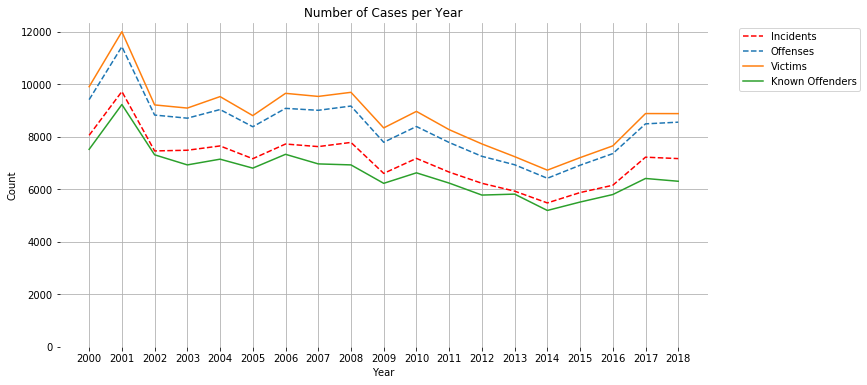

In [113]:
x = ['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', 
    '2014', '2015', '2016', '2017', '2018']
plt.figure(figsize=(10,5))

p1 = plt.plot(num_incidents, 'r--')
p2 = plt.plot(num_offenses, linestyle='dashed')
p3 = plt.plot(num_victims)
p4 = plt.plot(num_knownoff)
plt.legend((p1[0], p2[0], p3[0], p4[0], p5[0]), ('Incidents', 'Offenses', 'Victims', 'Known Offenders'),
          bbox_to_anchor=(1.04,1), loc="upper left")


plt.title('Number of Cases per Year')
plt.grid(True)
plt.xlabel('Year')
plt.ylabel('Count')
xi = list(range(len(x)))
plt.ylim(ymin=0) 
plt.xticks(xi, x)
plt.tick_params(axis='x', which='major', labelsize=10)
plt.box(on=None)
plt.subplots_adjust(left=0.09, bottom=0.07, right=0.99, top=0.97, wspace=0.2 , hspace=0.17)
plt.show()


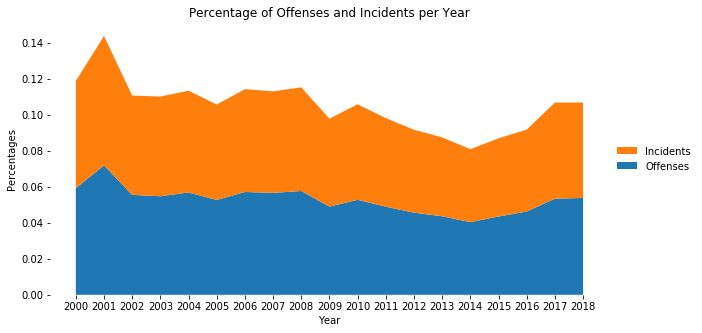

In [114]:
plt.figure(figsize = (10,5))
offenses_perc = np.array(num_offenses)/np.sum(num_offenses)
incidents_perc = np.array(num_incidents)/np.sum(num_incidents)
plt.stackplot(x, offenses_perc, incidents_perc, labels = ['Offenses', 'Incidents'])
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5), labelspacing=-2.5, frameon=False)
plt.xlabel('Year')
plt.ylabel('Percentages')
plt.title('Percentage of Offenses and Incidents per Year')
plt.box(on=None)
plt.show()